In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import os
for dirname, _, filenames in os.walk('/Online Retail/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Specify the numerical columns for outlier detection
numerical_columns = ['Quantity', 'UnitPrice']

# Calculate Z-scores for each numerical column
z_scores = stats.zscore(df[numerical_columns])

# Define a threshold for outlier detection (e.g., |Z| > 3)
threshold = 3

# Identify outlier indices
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove rows containing outliers
cleaned_df = df[~outlier_indices]

# Display the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_df.shape)

Original dataset shape: (406829, 8)
Cleaned dataset shape: (406492, 8)


In [ ]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [ ]:
from scipy import stats

# Specify the numerical columns for outlier detection
numerical_columns = ['Quantity', 'UnitPrice']

# Calculate Z-scores for each numerical column
z_scores = stats.zscore(df[numerical_columns])

# Define a threshold for outlier detection (e.g., |Z| > 3)
threshold = 3

# Identify outlier indices
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove rows containing outliers
cleaned_df = df[~outlier_indices]

# Display the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_df.shape)


Original dataset shape: (406829, 8)
Cleaned dataset shape: (406492, 8)


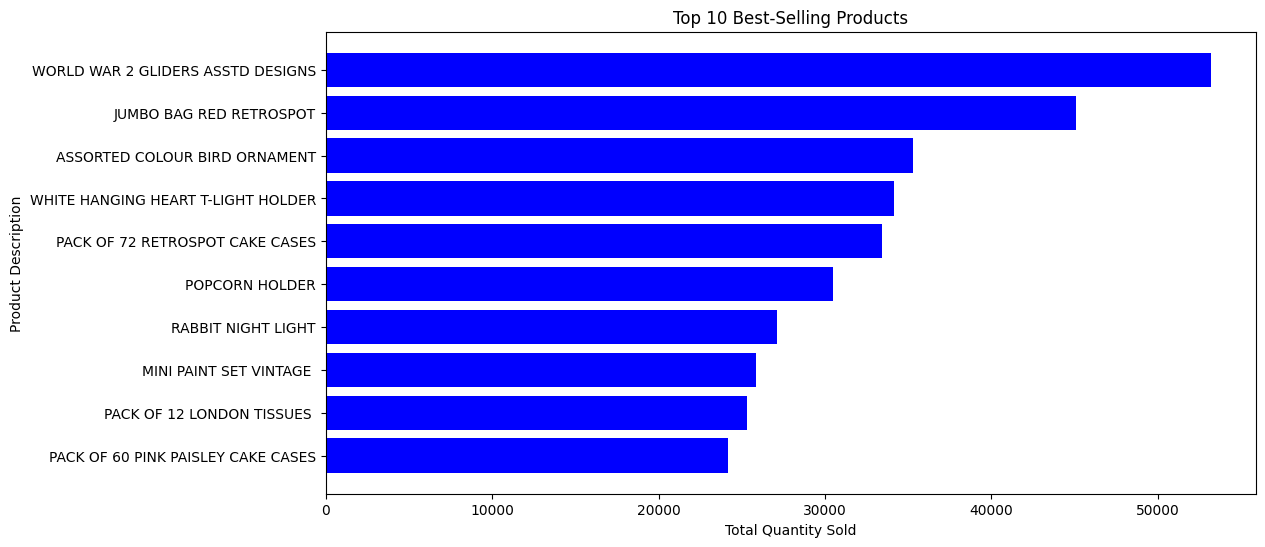

In [ ]:

import matplotlib.pyplot as plt


# Group the data by product and calculate the total quantity sold for each product
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products based on the total quantity sold
product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False)

# Visualize the top-selling products
top_n = 10  # Specify the number of top-selling products to visualize
top_products = product_sales_sorted.head(top_n)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
plt.barh(top_products['Description'], top_products['Quantity'], color='blue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top {} Best-Selling Products'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display the highest-selling product on top
plt.show()
